# Imports

In [1]:
import os
import sys

import numpy as np

from deepverse import ParameterManager
from deepverse.scenario import ScenarioManager
from deepverse import Dataset

from deepverse.visualizers import ImageVisualizer, LidarVisualizer

In [2]:
# Path to the configuration file
scenario_name = "DT31"
config_path = f"scenarios/{scenario_name}/param/config.m"

# Initialize ParameterManager and load parameters
param_manager = ParameterManager(config_path)
params = param_manager.get_params()

# Print the loaded parameters
print(params)

{'dataset_folder': 'scenarios', 'scenario': 'DT31', 'scenes': [1, 2], 'basestations': [1], 'comm': {'enable': True, 'bs_antenna': {'shape': [16, 1], 'rotation': [0, 0, -45.04], 'spacing': 0.5, 'FoV': [360, 180]}, 'ue_antenna': {'shape': [1, 1], 'rotation': [0, 0, 0], 'spacing': 0.5, 'FoV': [360, 180]}, 'OFDM': {'bandwidth': 0.05, 'subcarriers': 512, 'selected_subcarriers': [0, 1, 2, 3, 4, 5, 6, 7]}, 'activate_RX_filter': 0, 'generate_OFDM_channels': 1, 'num_paths': 25, 'enable_Doppler': 1}, 'radar': {'enable': True, 'tx_antenna': {'shape': [1, 1], 'rotation': [0, 0, -45.04], 'spacing': 0.5, 'FoV': [180, 180]}, 'rx_antenna': {'shape': [16, 1], 'rotation': [0, 0, -45.04], 'spacing': 0.5, 'FoV': [180, 180]}, 'FMCW': {'chirp_slope': 8014000000000.0, 'Fs': 6200000.0, 'n_samples_per_chirp': 256, 'n_chirps': 256}, 'num_paths': 50000}, 'camera': True, 'camera_id': ['unit1_cam1'], 'lidar': True, 'lidar_id': ['unit1_lidar1'], 'position': True}


# data shape

In [3]:
for k, v in params.items():
    print(f"{k}: {v}")


dataset_folder: scenarios
scenario: DT31
scenes: [1, 2]
basestations: [1]
comm: {'enable': True, 'bs_antenna': {'shape': [16, 1], 'rotation': [0, 0, -45.04], 'spacing': 0.5, 'FoV': [360, 180]}, 'ue_antenna': {'shape': [1, 1], 'rotation': [0, 0, 0], 'spacing': 0.5, 'FoV': [360, 180]}, 'OFDM': {'bandwidth': 0.05, 'subcarriers': 512, 'selected_subcarriers': [0, 1, 2, 3, 4, 5, 6, 7]}, 'activate_RX_filter': 0, 'generate_OFDM_channels': 1, 'num_paths': 25, 'enable_Doppler': 1}
radar: {'enable': True, 'tx_antenna': {'shape': [1, 1], 'rotation': [0, 0, -45.04], 'spacing': 0.5, 'FoV': [180, 180]}, 'rx_antenna': {'shape': [16, 1], 'rotation': [0, 0, -45.04], 'spacing': 0.5, 'FoV': [180, 180]}, 'FMCW': {'chirp_slope': 8014000000000.0, 'Fs': 6200000.0, 'n_samples_per_chirp': 256, 'n_chirps': 256}, 'num_paths': 50000}
camera: True
camera_id: ['unit1_cam1']
lidar: True
lidar_id: ['unit1_lidar1']
position: True


In [4]:
# modifiy the parameters
# param_manager.params['scenes'] = list(range(0, 10))
# param_manager.params['radar']['enabled'] = True


# Generate a dataset

In [5]:
dataset = Dataset(config_path)

Generating camera dataset: ⏳ In progress
Generating camera dataset: ✅ Completed (0.04s)
Generating LiDAR dataset: ⏳ In progress
Generating LiDAR dataset: ✅ Completed (0.00s)
Generating mobility dataset: ⏳ In progress
Generating mobility dataset: ✅ Completed (0.00s)
Generating comm dataset: ⏳ In progress


Generating comm dataset: ✅ Completed (0.24s)
Generating radar dataset: ⏳ In progress


Generating radar dataset: ✅ Completed (5.36s)


In [6]:
dataset.__dict__

{'param_manager': <deepverse.parameter.parameter_manager.ParameterManager at 0x7e2ccdc43fb0>,
 'params': {'dataset_folder': 'scenarios',
  'scenario': 'DT31',
  'scenes': [1, 2],
  'basestations': [1],
  'comm': {'enable': True,
   'bs_antenna': {'shape': [16, 1],
    'rotation': array([  0.  ,   0.  , -45.04]),
    'spacing': 0.5,
    'FoV': [360, 180]},
   'ue_antenna': {'shape': [1, 1],
    'rotation': array([0, 0, 0]),
    'spacing': 0.5,
    'FoV': [360, 180]},
   'OFDM': {'bandwidth': 0.05,
    'subcarriers': 512,
    'selected_subcarriers': [0, 1, 2, 3, 4, 5, 6, 7]},
   'activate_RX_filter': 0,
   'generate_OFDM_channels': 1,
   'num_paths': 25,
   'enable_Doppler': 1},
  'radar': {'enable': True,
   'tx_antenna': {'shape': [1, 1],
    'rotation': array([  0.  ,   0.  , -45.04]),
    'spacing': 0.5,
    'FoV': [180, 180]},
   'rx_antenna': {'shape': [16, 1],
    'rotation': array([  0.  ,   0.  , -45.04]),
    'spacing': 0.5,
    'FoV': [180, 180]},
   'FMCW': {'chirp_slope': 80

# communication dataset

In [7]:
comm = dataset.comm_dataset

In [8]:
help(comm)

Help on CommunicationDataset in module deepverse.datasets.wireless_datasets object:

class CommunicationDataset(builtins.object)
 |  CommunicationDataset(params)
 |
 |  Methods defined here:
 |
 |  __init__(self, params)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  get_bs_channel(self, tx_idx, rx_idx, time_idx)
 |
 |  get_bs_location(self, bs_idx, time_idx)
 |
 |  get_ue_channel(self, ue_idx, bs_idx, time_idx)
 |
 |  get_ue_location(self, ue_idx, bs_idx, time_idx)
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



In [9]:
comm.data

[[{'bs_loc': array([-57.771 ,  96.141 ,   3.4537], dtype=float32),
   'ue': [<deepverse.wireless.Channel.OFDMChannel at 0x7e2cdac1e000>],
   'ue_loc': array([[-44.6594,  93.8778,   1.68  ]], dtype=float32),
   'bs': [<deepverse.wireless.Channel.OFDMChannel at 0x7e2ccda16150>]}],
 [{'bs_loc': array([-57.771 ,  96.141 ,   3.4537], dtype=float32),
   'ue': [<deepverse.wireless.Channel.OFDMChannel at 0x7e2ccda165a0>],
   'ue_loc': array([[-44.6245,  93.4295,   1.68  ]], dtype=float32),
   'bs': [<deepverse.wireless.Channel.OFDMChannel at 0x7e2ccda15730>]}]]

In [10]:
# 수신신호(다운링크) : ue 송신신호(업링크) : bs
ch = comm.data[0][0]['ue'][0]
print(type(ch))
print([x for x in dir(ch) if not x.startswith("_")][:50])  # 너무 길면 50개만

<class 'deepverse.wireless.Channel.OFDMChannel'>
['LoS_status', 'bandwidth', 'carrier_freq', 'coeffs', 'doppler_shift', 'generate', 'params', 'paths', 'rx_antenna', 'rx_filter', 'subcarrier_freq', 'subcarriers', 'total_subcarriers', 'tx_antenna']


In [11]:
# 다운링크에 대해
ch = comm.data[0][0]['ue'][0]  # 예시

# 1) coeffs
print("coeffs shape:", ch.coeffs.shape)
print("coeffs head1:", ch.coeffs.reshape(-1)[0])  # 가장 안전한 head1
print("coeffs:", ch.coeffs)  # head5

# 2) LoS_status (배열/스칼라 둘 다 대응)
try:
    print("LoS_status shape:", ch.LoS_status.shape)
    print("LoS_status head1:", ch.LoS_status.reshape(-1)[0])
except Exception:
    print("LoS_status:", ch.LoS_status)

# 3) doppler_shift
try:
    print("doppler_shift shape:", ch.doppler_shift.shape)
    print("doppler_shift head1:", ch.doppler_shift.reshape(-1)[0])
except Exception:
    print("doppler_shift:", ch.doppler_shift)

# 4) carrier_freq (보통 스칼라)
print("carrier_freq:", ch.carrier_freq)

# 5) bandwidth (보통 스칼라/None)
print("bandwidth:", ch.bandwidth)

# 6) subcarrier_freq (배열일 가능성 큼)
try:
    print("subcarrier_freq shape:", ch.subcarrier_freq.shape)
    print("subcarrier_freq head1:", ch.subcarrier_freq.reshape(-1)[0])
except Exception:
    print("subcarrier_freq:", ch.subcarrier_freq)

# 7) subcarriers (배열/리스트일 가능성)
try:
    print("subcarriers shape:", ch.subcarriers.shape)
    print("subcarriers head1:", ch.subcarriers.reshape(-1)[0])
except Exception:
    try:
        print("subcarriers len:", len(ch.subcarriers))
        print("subcarriers head1:", ch.subcarriers[0])
    except Exception:
        print("subcarriers:", ch.subcarriers)

# 8) total_subcarriers (정수일 가능성)
print("total_subcarriers:", ch.total_subcarriers)

# 9) params (dict일 가능성)
try:
    print("params keys:", list(ch.params.keys())[:30])
    k0 = next(iter(ch.params))
    print("params head1:", (k0, ch.params[k0]))
except Exception:
    print("params:", ch.params)

# 10) paths (객체일 가능성 → 타입/내부 보기)
print("paths type:", type(ch.paths))
try:
    print("paths attrs:", list(ch.paths.__dict__.keys())[:30])
except Exception:
    print("paths dir:", [x for x in dir(ch.paths) if not x.startswith("_")][:30])

# 11) tx_antenna (객체)
print("tx_antenna type:", type(ch.tx_antenna))
try:
    print("tx_antenna attrs:", list(ch.tx_antenna.__dict__.keys())[:30])
except Exception:
    print("tx_antenna dir:", [x for x in dir(ch.tx_antenna) if not x.startswith("_")][:30])

# 12) rx_antenna (객체)
print("rx_antenna type:", type(ch.rx_antenna))
try:
    print("rx_antenna attrs:", list(ch.rx_antenna.__dict__.keys())[:30])
except Exception:
    print("rx_antenna dir:", [x for x in dir(ch.rx_antenna) if not x.startswith("_")][:30])

# 13) rx_filter (객체/배열 둘 다 가능)
print("rx_filter type:", type(ch.rx_filter))
try:
    print("rx_filter shape:", ch.rx_filter.shape)
    print("rx_filter head1:", ch.rx_filter.reshape(-1)[0])
except Exception:
    try:
        print("rx_filter attrs:", list(ch.rx_filter.__dict__.keys())[:30])
    except Exception:
        print("rx_filter dir:", [x for x in dir(ch.rx_filter) if not x.startswith("_")][:30])



coeffs shape: (1, 16, 8)
coeffs head1: (-1.176407846449244e-06-8.535860066815936e-07j)
coeffs: [[[-1.17640785e-06-8.53586007e-07j -1.19722048e-06-7.80688349e-07j
   -1.20395004e-06-7.09274155e-07j -1.19823309e-06-6.44389581e-07j
   -1.18395773e-06-5.89746166e-07j -1.16619131e-06-5.46678630e-07j
   -1.14968686e-06-5.13923326e-07j -1.13755315e-06-4.88309587e-07j]
  [ 1.15099402e-06-7.12551253e-07j  1.13833636e-06-7.56171041e-07j
    1.12228957e-06-8.04204537e-07j  1.09953574e-06-8.55512308e-07j
    1.06777721e-06-9.06949660e-07j  1.02680424e-06-9.54310437e-07j
    9.78784722e-07-9.93742198e-07j  9.27648837e-07-1.02305747e-06j]
  [ 4.12770402e-07+1.23775396e-06j  4.59811319e-07+1.22360393e-06j
    4.99873100e-07+1.20413607e-06j  5.32118946e-07+1.18384094e-06j
    5.58225200e-07+1.16678022e-06j  5.81632209e-07+1.15530290e-06j
    6.06226422e-07+1.14947422e-06j  6.35009455e-07+1.14739131e-06j]
  [-1.22782766e-06+2.85390146e-07j -1.21500592e-06+3.05845278e-07j
   -1.20642080e-06+3.28435149e-

In [12]:
p = ch.paths
i = 0
print("power:", p.power[i])
print("phase:", p.phase[i])
print("ToA:", p.ToA[i])
print("DoD(theta,phi):", p.DoD_theta[i], p.DoD_phi[i])
print("DoA(theta,phi):", p.DoA_theta[i], p.DoA_phi[i])
print("doppler_vel:", p.doppler_vel[i])
print("doppler_acc:", p.doppler_acc[i])
print("carrier_freq:", p.carrier_freq)
print("wavelength:", p.wavelength)
print("antenna_applied:", p.antenna_applied)

power: 8.392863e-10
phase: -131.733
ToA: 4.47894e-08
DoD(theta,phi): 1.703321 0.6151711
DoA(theta,phi): 1.4382715 2.9706726
doppler_vel: 1.0563956
doppler_acc: 0.0
carrier_freq: 60000000000.0
wavelength: 200.13845711889124
antenna_applied: True


In [13]:
# 업링크에 대해
ch_bs = comm.data[0][0]['bs'][0]  # 예시

# 1) coeffs
print("coeffs shape:", ch_bs.coeffs.shape)
print("coeffs head1:", ch_bs.coeffs.reshape(-1)[0])


# 2) LoS_status
try:
    print("LoS_status shape:", ch_bs.LoS_status.shape)
    print("LoS_status head1:", ch_bs.LoS_status.reshape(-1)[0])
except Exception:
    print("LoS_status:", ch_bs.LoS_status)

# 3) doppler_shift
try:
    print("doppler_shift shape:", ch_bs.doppler_shift.shape)
    print("doppler_shift head1:", ch_bs.doppler_shift.reshape(-1)[0])
except Exception:
    print("doppler_shift:", ch_bs.doppler_shift)

# 4) carrier_freq
print("carrier_freq:", ch_bs.carrier_freq)

# 5) bandwidth
print("bandwidth:", ch_bs.bandwidth)

# 6) subcarrier_freq
try:
    print("subcarrier_freq shape:", ch_bs.subcarrier_freq.shape)
    print("subcarrier_freq head1:", ch_bs.subcarrier_freq.reshape(-1)[0])
except Exception:
    print("subcarrier_freq:", ch_bs.subcarrier_freq)

# 7) subcarriers
try:
    print("subcarriers shape:", ch_bs.subcarriers.shape)
    print("subcarriers head1:", ch_bs.subcarriers.reshape(-1)[0])
except Exception:
    try:
        print("subcarriers len:", len(ch_bs.subcarriers))
        print("subcarriers head1:", ch_bs.subcarriers[0])
    except Exception:
        print("subcarriers:", ch_bs.subcarriers)

# 8) total_subcarriers
print("total_subcarriers:", ch_bs.total_subcarriers)

# 9) params
try:
    print("params keys:", list(ch_bs.params.keys())[:30])
    k0 = next(iter(ch_bs.params))
    print("params head1:", (k0, ch_bs.params[k0]))
except Exception:
    print("params:", ch_bs.params)

# 10) paths
print("paths type:", type(ch_bs.paths))
try:
    print("paths attrs:", list(ch_bs.paths.__dict__.keys())[:30])
except Exception:
    print("paths dir:", [x for x in dir(ch_bs.paths) if not x.startswith("_")][:30])

# 11) tx_antenna
print("tx_antenna type:", type(ch_bs.tx_antenna))
try:
    print("tx_antenna attrs:", list(ch_bs.tx_antenna.__dict__.keys())[:30])
except Exception:
    print("tx_antenna dir:", [x for x in dir(ch_bs.tx_antenna) if not x.startswith("_")][:30])

# 12) rx_antenna
print("rx_antenna type:", type(ch_bs.rx_antenna))
try:
    print("rx_antenna attrs:", list(ch_bs.rx_antenna.__dict__.keys())[:30])
except Exception:
    print("rx_antenna dir:", [x for x in dir(ch_bs.rx_antenna) if not x.startswith("_")][:30])

# 13) rx_filter
print("rx_filter type:", type(ch_bs.rx_filter))
try:
    print("rx_filter shape:", ch_bs.rx_filter.shape)
    print("rx_filter head1:", ch_bs.rx_filter.reshape(-1)[0])
except Exception:
    try:
        print("rx_filter attrs:", list(ch_bs.rx_filter.__dict__.keys())[:30])
    except Exception:
        print("rx_filter dir:", [x for x in dir(ch_bs.rx_filter) if not x.startswith("_")][:30])

coeffs shape: (16, 16, 8)
coeffs head1: (-9.241837160610946e-07-2.8756219374079657e-07j)
LoS_status: -1
doppler_shift: 1
carrier_freq: 60000000000.0
bandwidth: 50000000.0
subcarrier_freq shape: (1, 8)
subcarrier_freq head1: 0.0
subcarriers len: 8
subcarriers head1: 0
total_subcarriers: 512
params keys: ['basestations', 'dataset_folder', 'scenario', 'scenes', 'enable', 'bs_antenna', 'ue_antenna', 'OFDM', 'activate_RX_filter', 'generate_OFDM_channels', 'num_paths', 'enable_Doppler', 'user_rows', 'scenario_params_path', 'scenario_params', 'tx_ant_objs', 'active_UE', 'rx_ant_objs']
params head1: ('basestations', array([1]))
paths type: <class 'deepverse.wireless.Paths.Paths'>
paths attrs: ['power', 'phase', 'ToA', 'DoD_theta', 'DoD_phi', 'DoA_theta', 'DoA_phi', 'doppler_vel', 'doppler_acc', 'carrier_freq', 'wavelength', 'antenna_applied']
tx_antenna type: <class 'deepverse.wireless.Antenna.Antenna'>
tx_antenna attrs: ['shape', 'rotation', 'FoV', 'spacing', '_element_idx', '_kd']
rx_antenna

In [14]:
p = ch_bs.paths
i = 0
print("power:", p.power[i])
print("phase:", p.phase[i])
print("ToA:", p.ToA[i])
print("DoD(theta,phi):", p.DoD_theta[i], p.DoD_phi[i])
print("DoA(theta,phi):", p.DoA_theta[i], p.DoA_phi[i])
print("doppler_vel:", p.doppler_vel[i])
print("doppler_acc:", p.doppler_acc[i])
print("carrier_freq:", p.carrier_freq)
print("wavelength:", p.wavelength)
print("antenna_applied:", p.antenna_applied)

power: 4.6182794e-10
phase: -158.679
ToA: 2.30481e-08
DoD(theta,phi): 3.1415927 0.0
DoA(theta,phi): 3.1415927 0.0
doppler_vel: 0.0
doppler_acc: 0.0
carrier_freq: 60000000000.0
wavelength: 200.13845711889124
antenna_applied: True


# radar Dataset

In [15]:
radar = dataset.radar_dataset
radar.__dict__

{'params': {'basestations': array([1]),
  'dataset_folder': 'scenarios',
  'scenario': 'DT31',
  'scenes': [1, 2],
  'enable': True,
  'tx_antenna': {'shape': [1, 1],
   'rotation': array([  0.  ,   0.  , -45.04]),
   'spacing': 0.5,
   'FoV': [180, 180]},
  'rx_antenna': {'shape': [16, 1],
   'rotation': array([  0.  ,   0.  , -45.04]),
   'spacing': 0.5,
   'FoV': [180, 180]},
  'FMCW': {'chirp_slope': 8014000000000.0,
   'Fs': 6200000.0,
   'n_samples_per_chirp': 256,
   'n_chirps': 256},
  'num_paths': 50000,
  'user_rows': array([0]),
  'scenario_params_path': '/home/yuknow01/Deepverse/scenarios/DT31/wireless/params.mat',
  'scenario_params': {'carrier_freq': 60000000000.0,
   'tx_power': 0.0,
   'num_BS': 1,
   'user_grids': array([[1, 1, 1]]),
   'doppler_available': 1,
   'dual_polar_available': 0},
  'tx_ant_objs': [<deepverse.wireless.Antenna.Antenna at 0x7e2cdabb6180>],
  'rx_ant_objs': [<deepverse.wireless.Antenna.Antenna at 0x7e2ce136e390>]},
 'data': [[[<deepverse.wireles

In [16]:
radar_ch = radar.data[0][0][0]
print([x for x in dir(radar_ch) if not x.startswith("_")])


['LoS_status', 'bandwidth', 'carrier_freq', 'coeffs', 'generate', 'params', 'paths', 'rx_antenna', 'tx_antenna', 'waveform']


In [17]:
print("coeffs shape:", radar_ch.coeffs.shape)
print("coeffs head1:", radar_ch.coeffs.reshape(-1)[0])


coeffs shape: (16, 1, 256, 256)
coeffs head1: (2.2430005255584542e-05+1.277697717755427e-05j)


In [18]:
# radar 채널 객체 가져오기 (사진 기준)
radar_ch = radar.data[0][0][0]  

print([x for x in dir(radar_ch) if not x.startswith("__")])

# 1) coeffs
print("coeffs shape:", radar_ch.coeffs.shape)
print("coeffs head1:", radar_ch.coeffs.reshape(-1)[0])

# 2) LoS_status
try:
    print("LoS_status shape:", radar_ch.LoS_status.shape)
    print("LoS_status head1:", radar_ch.LoS_status.reshape(-1)[0])
except Exception:
    print("LoS_status:", radar_ch.LoS_status)

# 3) carrier_freq
try:
    print("carrier_freq:", radar_ch.carrier_freq)
except Exception as e:
    print("carrier_freq: <missing>", e)

# 4) bandwidth
try:
    print("bandwidth:", radar_ch.bandwidth)
except Exception as e:
    print("bandwidth: <missing>", e)

# 5) params
try:
    print("params keys:", list(radar_ch.params.keys())[:30])
    k0 = next(iter(radar_ch.params))
    print("params head1:", (k0, radar_ch.params[k0]))
except Exception:
    print("params:", getattr(radar_ch, "params", None))

# 6) paths
print("paths type:", type(radar_ch.paths))
try:
    print("paths attrs:", list(radar_ch.paths.__dict__.keys())[:30])
except Exception:
    print("paths dir:", [x for x in dir(radar_ch.paths) if not x.startswith("_")][:30])

# 7) tx_antenna
print("tx_antenna type:", type(radar_ch.tx_antenna))
try:
    print("tx_antenna attrs:", list(radar_ch.tx_antenna.__dict__.keys())[:30])
except Exception:
    print("tx_antenna dir:", [x for x in dir(radar_ch.tx_antenna) if not x.startswith("_")][:30])

# 8) rx_antenna
print("rx_antenna type:", type(radar_ch.rx_antenna))
try:
    print("rx_antenna attrs:", list(radar_ch.rx_antenna.__dict__.keys())[:30])
except Exception:
    print("rx_antenna dir:", [x for x in dir(radar_ch.rx_antenna) if not x.startswith("_")][:30])

# 9) waveform
print("waveform type:", type(radar_ch.waveform))
try:
    print("waveform attrs:", list(radar_ch.waveform.__dict__.keys())[:30])
except Exception:
    print("waveform dir:", [x for x in dir(radar_ch.waveform) if not x.startswith("_")][:30])

# 10) generate (메서드 존재 여부만)
try:
    print("generate:", radar_ch.generate, "| callable:", callable(radar_ch.generate))
except Exception as e:
    print("generate: <missing>", e)

# (옵션) 혹시 doppler_shift 같은 게 있을 수도 있으니 있으면 찍기
for name in ["doppler_shift", "subcarrier_freq", "subcarriers", "total_subcarriers"]:
    if hasattr(radar_ch, name):
        obj = getattr(radar_ch, name)
        try:
            print(f"{name} shape:", obj.shape)
            print(f"{name} head1:", obj.reshape(-1)[0])
        except Exception:
            try:
                print(f"{name} len:", len(obj))
                print(f"{name} head1:", obj[0])
            except Exception:
                print(f"{name}:", obj)


['LoS_status', 'bandwidth', 'carrier_freq', 'coeffs', 'generate', 'params', 'paths', 'rx_antenna', 'tx_antenna', 'waveform']
coeffs shape: (16, 1, 256, 256)
coeffs head1: (2.2430005255584542e-05+1.277697717755427e-05j)
LoS_status: -1
carrier_freq: 60000000000.0
bandwidth: None
params keys: ['basestations', 'dataset_folder', 'scenario', 'scenes', 'enable', 'tx_antenna', 'rx_antenna', 'FMCW', 'num_paths', 'user_rows', 'scenario_params_path', 'scenario_params', 'tx_ant_objs', 'rx_ant_objs']
params head1: ('basestations', array([1]))
paths type: <class 'deepverse.wireless.Paths.Paths'>
paths attrs: ['power', 'phase', 'ToA', 'DoD_theta', 'DoD_phi', 'DoA_theta', 'DoA_phi', 'doppler_vel', 'doppler_acc', 'carrier_freq', 'wavelength', 'antenna_applied']
tx_antenna type: <class 'deepverse.wireless.Antenna.Antenna'>
tx_antenna attrs: ['shape', 'rotation', 'FoV', 'spacing', '_element_idx', '_kd']
rx_antenna type: <class 'deepverse.wireless.Antenna.Antenna'>
rx_antenna attrs: ['shape', 'rotation', 

In [19]:
radar = radar_ch.paths
i=0
print("power:", radar.power[i])
print("phase:", radar.phase[i])
print("ToA:", radar.ToA[i])
print("DoD(theta,phi):", radar.DoD_theta[i], radar.DoD_phi[i])
print("DoA(theta,phi):", radar.DoA_theta[i], radar.DoA_phi[i])
print("doppler_vel:", radar.doppler_vel[i])
print("doppler_acc:", radar.doppler_acc[i])
print("carrier_freq:", radar.carrier_freq)
print("wavelength:", radar.wavelength)
print("antenna_applied:", radar.antenna_applied)


power: 4.6182794e-10
phase: -158.679
ToA: 2.30481e-08
DoD(theta,phi): 3.1415927 0.0
DoA(theta,phi): 3.1415927 0.0
doppler_vel: 0.0
doppler_acc: 0.0
carrier_freq: 60000000000.0
wavelength: 200.13845711889124
antenna_applied: True


In [20]:
radar_waveform = radar_ch.waveform
print("Fs", radar_waveform.Fs)
print("T_chirp", radar_waveform.T_chirp)
print("T_frame", radar_waveform.T_frame)
print("T_period", radar_waveform.T_period)
print("Bandwidth", radar_waveform.bandwidth)
print("chirp_slopes", radar_waveform.chirp_slope)
print("f_0",radar_waveform.f_0)
print("generate_samples", radar_waveform.generate_samples)
print("n_chrips", radar_waveform.n_chirps)
print("n_samples_per_chirp", radar_waveform.n_samples_per_chirp)
print("time", radar_waveform.time)
print("time_length", len(radar_waveform.time))
print("time_fast", radar_waveform.time_fast)
print("time_fast_length", len(radar_waveform.time_fast))

Fs 6200000.0
T_chirp 4.129032258064516e-05
T_frame 0.01057032258064516
T_period 4.129032258064516e-05
Bandwidth 330900645.1612903
chirp_slopes 8014000000000.0
f_0 60000000000.0
generate_samples <bound method FMCW.generate_samples of <deepverse.wireless.Waveform.FMCW object at 0x7e2cdaded7c0>>
n_chrips 256
n_samples_per_chirp 256
time [0.00000000e+00 1.61290323e-07 3.22580645e-07 ... 1.05698387e-02
 1.05700000e-02 1.05701613e-02]
time_length 65536
time_fast [0.00000000e+00 1.61290323e-07 3.22580645e-07 4.83870968e-07
 6.45161290e-07 8.06451613e-07 9.67741935e-07 1.12903226e-06
 1.29032258e-06 1.45161290e-06 1.61290323e-06 1.77419355e-06
 1.93548387e-06 2.09677419e-06 2.25806452e-06 2.41935484e-06
 2.58064516e-06 2.74193548e-06 2.90322581e-06 3.06451613e-06
 3.22580645e-06 3.38709677e-06 3.54838710e-06 3.70967742e-06
 3.87096774e-06 4.03225806e-06 4.19354839e-06 4.35483871e-06
 4.51612903e-06 4.67741935e-06 4.83870968e-06 5.00000000e-06
 5.16129032e-06 5.32258065e-06 5.48387097e-06 5.645

In [21]:
print(len(radar_waveform.time))

65536


# lidar dataset

In [22]:
lidar = dataset.lidar_dataset
lidar.__dict__

{'params': {'dataset_folder': 'scenarios',
  'scenario': 'DT31',
  'scenes': [1, 2],
  'basestations': [1],
  'comm': {'enable': True,
   'bs_antenna': {'shape': [16, 1],
    'rotation': array([  0.  ,   0.  , -45.04]),
    'spacing': 0.5,
    'FoV': [360, 180]},
   'ue_antenna': {'shape': [1, 1],
    'rotation': array([0, 0, 0]),
    'spacing': 0.5,
    'FoV': [360, 180]},
   'OFDM': {'bandwidth': 0.05,
    'subcarriers': 512,
    'selected_subcarriers': [0, 1, 2, 3, 4, 5, 6, 7]},
   'activate_RX_filter': 0,
   'generate_OFDM_channels': 1,
   'num_paths': 25,
   'enable_Doppler': 1},
  'radar': {'enable': True,
   'tx_antenna': {'shape': [1, 1],
    'rotation': array([  0.  ,   0.  , -45.04]),
    'spacing': 0.5,
    'FoV': [180, 180]},
   'rx_antenna': {'shape': [16, 1],
    'rotation': array([  0.  ,   0.  , -45.04]),
    'spacing': 0.5,
    'FoV': [180, 180]},
   'FMCW': {'chirp_slope': 8014000000000.0,
    'Fs': 6200000.0,
    'n_samples_per_chirp': 256,
    'n_chirps': 256},
   '

In [23]:
# LiDAR dataset 객체
lidar_ds = dataset.lidar_dataset  # 너가 이미 사용한 방식

print("=== lidar_dataset members (public) ===")
print([x for x in dir(lidar_ds) if not x.startswith("_")])

print("\n=== lidar_dataset.__dict__ keys ===")
print(list(lidar_ds.__dict__.keys()))

# 1) params (설정)
try:
    print("\nparams keys:", list(lidar_ds.params.keys())[:50])
    print("params['scenario']:", lidar_ds.params.get("scenario", None))
    print("params['scenes']:", lidar_ds.params.get("scenes", None))
    print("params['comm']['enable']:", lidar_ds.params.get("comm", {}).get("enable", None))
    print("params['radar']['enable']:", lidar_ds.params.get("radar", {}).get("enable", None))
except Exception as e:
    print("params: <missing or not dict>", e)

# 2) device_type
print("\ndevice_type:", getattr(lidar_ds, "device_type", None))

# 3) sensors
sensors = getattr(lidar_ds, "sensors", None)
print("\nsensors type:", type(sensors))
try:
    print("sensor ids:", list(sensors.keys())[:20])
    sid0 = next(iter(sensors))
    print("sensor head1 id:", sid0)
    print("sensor head1:", sensors[sid0])
except Exception as e:
    print("sensors:", sensors, "| err:", e)

# 4) visualizer
viz = getattr(lidar_ds, "visualizer", None)
print("\nvisualizer type:", type(viz))
if viz is not None:
    try:
        print("visualizer attrs:", list(viz.__dict__.keys())[:50])
    except Exception:
        print("visualizer dir:", [x for x in dir(viz) if not x.startswith("_")][:50])

# 5) data (실제 LiDAR 샘플)
data = getattr(lidar_ds, "data", None)
print("\n=== lidar_ds.data ===")
print("data type:", type(data))

# data가 list/tuple처럼 길이를 갖는지
try:
    print("len(data):", len(data))
except Exception as e:
    print("len(data): <no len>", e)

# 샘플 하나 꺼내보기 (가능한 가장 안전한 방식)
sample = None
try:
    sample = data[0]
    print("\n=== sample = data[0] ===")
except Exception as e:
    print("\nCannot index data[0]:", e)

if sample is not None:
    print("sample type:", type(sample))

    # dict면 key들 확인
    if isinstance(sample, dict):
        print("sample keys:", list(sample.keys())[:50])
        k0 = next(iter(sample))
        print("sample head1:", (k0, sample[k0]))

    # numpy/torch처럼 shape가 있으면 shape + head1
    if hasattr(sample, "shape"):
        print("sample shape:", sample.shape)
        try:
            print("sample head1:", sample.reshape(-1)[0])
        except Exception:
            try:
                # reshape가 안 되면 flat 접근 시도
                import numpy as np
                print("sample head1:", np.ravel(sample)[0])
            except Exception as e:
                print("sample head1: <cannot flatten>", e)

    # list/tuple면 첫 원소 보기
    if isinstance(sample, (list, tuple)):
        print("sample len:", len(sample))
        if len(sample) > 0:
            print("sample[0] type:", type(sample[0]))
            if hasattr(sample[0], "shape"):
                print("sample[0] shape:", sample[0].shape)
            else:
                print("sample[0]:", sample[0])


=== lidar_dataset members (public) ===
['device_type', 'generate', 'get_sample', 'list_sensors', 'num_devices', 'params', 'save_sample', 'sensor_id', 'sensors', 'set_visualization_backend', 'visualize', 'visualizer']

=== lidar_dataset.__dict__ keys ===
['params', 'device_type', 'sensors', 'sensor_id', 'num_devices', 'visualizer']

params keys: ['dataset_folder', 'scenario', 'scenes', 'basestations', 'comm', 'radar', 'camera', 'camera_id', 'lidar', 'lidar_id', 'position']
params['scenario']: DT31
params['scenes']: [1, 2]
params['comm']['enable']: True
params['radar']['enable']: True

device_type: LiDAR

sensors type: <class 'dict'>
sensor ids: ['unit1_lidar1']
sensor head1 id: unit1_lidar1
sensor head1: Sensor(id=unit1_lidar1, properties={'rotation': [-1.1, 0, -124.7], 'location': [-56.784, 94.372, 1.012], 'FoV': 360, 'range': 80, 'upper_fov': 10, 'lower_fov': -75, 'channels': 32}, files=7012 files)

visualizer type: <class 'deepverse.visualizers.lidar_visualizer.LidarVisualizer'>
visu

# camera and lidar

In [24]:
# 1) Access sample: Camera / LiDAR (get_sample)
camera_sample = dataset.get_sample('cam', index=0, device_index="unit1_cam1")  # Get sample from camera 1
print(camera_sample)

lidar_sample = dataset.get_sample('lidar', index=0, device_index="unit1_lidar1")  # Get sample from LiDAR 1
print(lidar_sample)


scenarios/DT31/RGB_images/unit1_cam1/1.png
scenarios/DT31/lidar/unit1_lidar1/1.pcd


# beam power

In [25]:
# Regenerate the dataset with 100 scenes
param_manager.params["scenes"] = list(range(100))
param_manager.params["radar"]["enable"] = False
dataset = Dataset(param_manager)

Generating camera dataset: ⏳ In progress
Generating camera dataset: ✅ Completed (0.00s)
Generating LiDAR dataset: ⏳ In progress
Generating LiDAR dataset: ✅ Completed (0.00s)
Generating mobility dataset: ⏳ In progress
Generating mobility dataset: ✅ Completed (0.00s)
Generating comm dataset: ⏳ In progress


Generating comm dataset: ✅ Completed (4.83s)


### Apply beam-steering codebook to BS-UE channels

In [26]:
beam_power = []

num_scene = len(dataset.params['scenes'])
for i in range(num_scene):
    channel = dataset.get_sample('comm-ue', index=i, bs_idx=0, ue_idx=0).coeffs
    ue_loc_ = dataset.get_sample('loc-ue', index=i, bs_idx=0, ue_idx=0)

    beam_power_ = (np.abs(codebook @ np.squeeze(channel, 0))**2).sum(-1)
    beam_power.append(beam_power_)

NameError: name 'codebook' is not defined

### Extract the positons of UE and BS

In [ ]:
ue_loc = []
for i in range(num_scene):
    ue_loc_ = dataset.get_sample('loc-ue', index=i, bs_idx=0, ue_idx=0)
    ue_loc.append(ue_loc_)

bs_loc = dataset.get_sample('loc-bs', index=0, bs_idx=0)

### Plot video

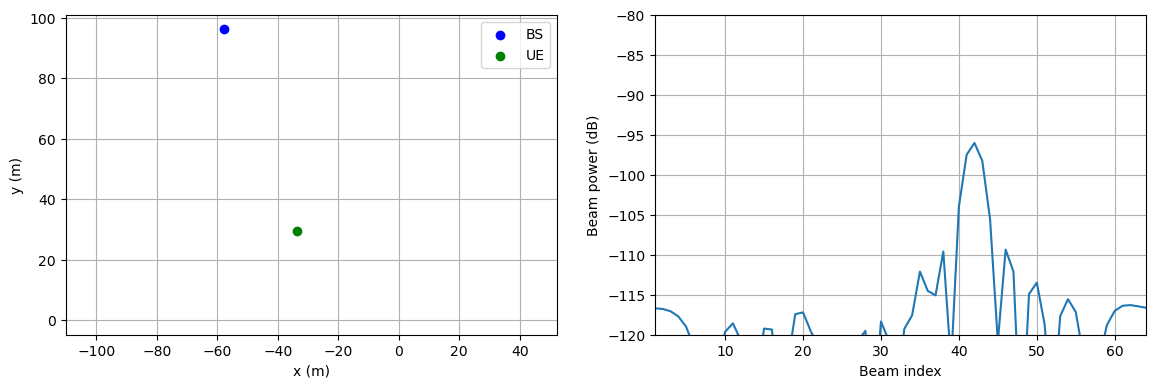

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Initialize plots
axes[0].scatter(bs_loc[0], bs_loc[1], color='b', label='BS')
ue_scatter = axes[0].scatter([0], [0], color='g', label='UE')
axes[0].set_xlim([-100, 100])
axes[0].set_ylim([0, 120])
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')
axes[0].legend()
axes[0].axis('equal')
axes[0].grid(True)

line, = axes[1].plot(range(1, num_angles + 1), 10 * np.log10(beam_power[0]))
axes[1].set_xlim([1, num_angles])
axes[1].set_ylim([-120, -80])
axes[1].set_xlabel('Beam index')
axes[1].set_ylabel('Beam power (dB)')
axes[1].grid(True)

fig.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.15)


# Update function for animation
def update(i):
    ue_scatter.set_offsets([ue_loc[i][0], ue_loc[i][1]])  # Update UE location
    line.set_data(range(1, num_angles + 1), 10 * np.log10(beam_power[i]))  # Update beam power
    return ue_scatter, line

# Create animation
ani = FuncAnimation(fig, update, frames=num_scene, interval=100, blit=True)

# Display the animation in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml(default_mode="once"))